# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [15]:


# Importando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf



In [16]:


#1 Carregue a base, os pacotes e reproduza este modelo aqui.

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()



,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [17]:
# 1.1 Remover outliers
tips = tips[tips['tip_pct']<.5]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [18]:
# 1.2 Regressão

reg_a = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.31e-12
Time:                        11:02:34   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

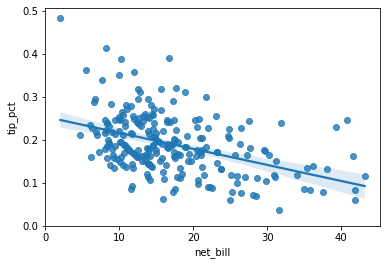

In [19]:
# 1.3 Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)



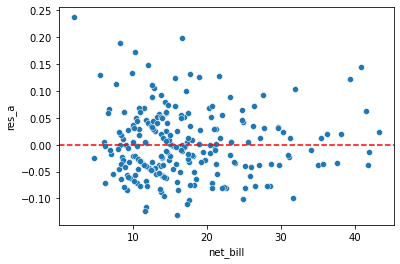

In [20]:


# 1.4 Gráfico de dispersão do resíduo

tips['res_a'] = reg_a.resid

sns.scatterplot(x = 'net_bill', y = 'res_a', data = tips)
plt.axhline(y=0, color='r', linestyle='--')



### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [21]:

#2 Ajustando o modelo tip_pct
# 2.1 Regressão

reg_b = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
reg_b.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.03e-14
Time:                        11:02:36   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

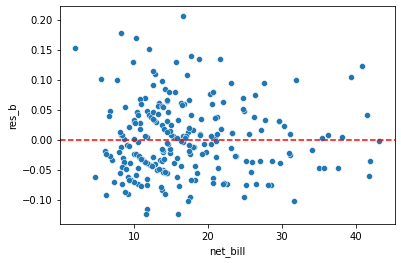

In [22]:
# 2.2 Gráfico de dispersão do resíduo
tips['res_b'] = reg_b.resid

sns.scatterplot(x = 'net_bill', y = 'res_b', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [23]:
#3

reg_c = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
reg_c.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.09e-12
Time:                        11:02:38   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2932      0.020     14.668      0.000       0.254       0.333
net_bill                 -0.0082      0.002     -3.961      0.000      -0.012      -0.004
np.power(net_bill, 2)     0.0001   4.67e-05      2.223      0.027    1.18e-05       0.000
==============================================================================
Omnibus:                       19.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.696   Prob(JB):                     1.50e-05
Kurtosis:                       3.514   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

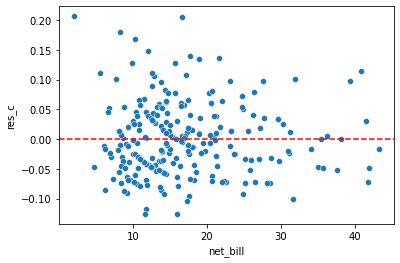

In [24]:


tips['res_c'] = reg_c.resid

sns.scatterplot(x = 'net_bill', y = 'res_c', data = tips)
plt.axhline(y=0, color='r', linestyle='--')



###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [25]:
#4 Ajustando o modelo tip_pct em função de net_bill
# 4.1 Regressão

reg_d = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
reg_d.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.70e-15
Time:                        11:02:38   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

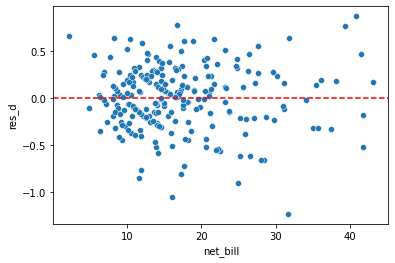

In [26]:
# 4.2 Gráfico de dispersão do resíduo

tips['res_d'] = reg_d.resid

sns.scatterplot(x = 'net_bill', y = 'res_d', data = tips)
plt.axhline(y=0, color='r', linestyle='--')



In [27]:


tips['pred_d'] = reg_d.fittedvalues

r = tips[['pred_d', 'tip_pct']].corr().iloc[0,1]

r**2



0.18946394629203064

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [28]:
#5 Ajustando o modelo no log do tip_pct em função do log de net_bill
# 5.1 Regressão

reg_e = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
reg_e.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.65e-15
Time:                        11:02:39   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

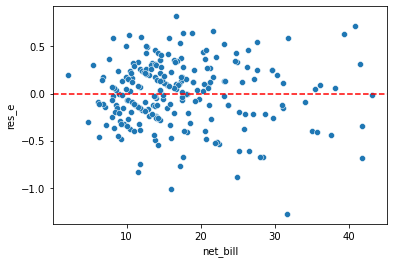

In [29]:
# 5.2 Gráfico de dispersão do resíduo

tips['res_e'] = reg_e.resid

sns.scatterplot(x = 'net_bill', y = 'res_e', data = tips)
plt.axhline(y=0, color='r', linestyle='--')



In [30]:


tips['pred_e'] = reg_e.fittedvalues

r = tips[['pred_e', 'tip_pct']].corr().iloc[0,1]

r**2



0.22104786698842266

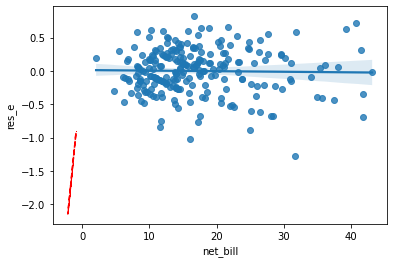

In [47]:
#5 - comparando o Gráfico de dispersão com o primeiro gráfico


sns.regplot(x = 'net_bill', y = 'res_e', data = tips)
plt.plot(tips['pred_e'], reg_e.fittedvalues,'r,--')

###  6. qual modelo resultou no melhor ajuste?



O modelo com melhor ajuste é o do item 5, pois utilizou o log do tip_pct em função do log de net_bill, resultando no maior R², igual a 0,23.
